<a href="https://colab.research.google.com/github/gundaminpde/2023-spring/blob/main/02_1_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Built-in data set인 iris_dataset 사용하기**

In [ ]:
from sklearn.datasets import load_iris    ## sklearn.dataset 안에는 빌트인 (built-in) 데이터 셋
iris_dataset = load_iris()

type(iris_dataset)

sklearn.utils._bunch.Bunch

In [ ]:
len(iris_dataset)

8

In [ ]:
print("iris_dataset의 키:\n", iris_dataset.keys())

iris_dataset의 키:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
print(iris_dataset['DESCR'][:193] + "\n...")  ## DESCR 대략적인 설명

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [ ]:
print("타깃의 이름:", iris_dataset['target_names'])

타깃의 이름: ['setosa' 'versicolor' 'virginica']


In [ ]:
print("특성의 이름:\n", iris_dataset['feature_names'])

특성의 이름:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
print("data의 타입:", type(iris_dataset['data']))

data의 타입: <class 'numpy.ndarray'>


In [ ]:
print("data의 크기:", iris_dataset['data'].shape)

data의 크기: (150, 4)


In [ ]:
print("data의 처음 다섯 행:\n", iris_dataset['data'][:5])

data의 처음 다섯 행:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

In [ ]:
print("타깃:\n", iris_dataset['target'])

타깃:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# **2. 다른 곳에서 iris_dataset 불러와 사용하기**

In [1]:
import pandas as pd

Url_iris="https://raw.githubusercontent.com/gundaminpde/2022/main/iris.csv"


# 아이리스 데이터를 불러옵니다.
df = pd.read_csv(Url_iris)

In [ ]:
## 어떻게 생겼는지 확인해 본다.

df.head()

,ID,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.tail()

,ID,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica
149,150,5.9,3.0,5.1,1.8,virginica


In [ ]:
df.shape

(150, 6)

In [ ]:
## 분류할 종류가 몇개인가 ?

df['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
### 고윳값 갯수 

df['Species'].nunique()

3

In [ ]:
### 값별의 데이터 숫자

df['Species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            150 non-null    int64  
 1   Sepal_Length  150 non-null    float64
 2   Sepal_Width   150 non-null    float64
 3   Petal_Length  150 non-null    float64
 4   Petal_Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.describe()

,ID,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [2]:
## 

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,1:5], df.loc[:,'Species'], random_state=0)


###X_train, X_test, y_train, y_test = train_test_split( df.iloc[:,1:5], df.loc[:,'Species'], stratify=df.loc[:,'Species'], random_state=0)
## stratify

In [ ]:
X_train.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
61,5.9,3.0,4.2,1.5
92,5.8,2.6,4.0,1.2
112,6.8,3.0,5.5,2.1
2,4.7,3.2,1.3,0.2
141,6.9,3.1,5.1,2.3


In [3]:
y_train.head()

61     versicolor
92     versicolor
112     virginica
2          setosa
141     virginica
Name: Species, dtype: object

In [ ]:
y_test.head()

114     virginica
62     versicolor
33         setosa
107     virginica
7          setosa
Name: Species, dtype: object

In [ ]:
type(y_test)

pandas.core.series.Series

# **3. 가장 먼저 할 일: 데이터 살펴보기**

참고삼아 **전체 dataset의 산점도**를 확인해 보겠습니다.


하지만, 실제로는 **training dataset만의 산점도**를 보는 것이 옳습니다.

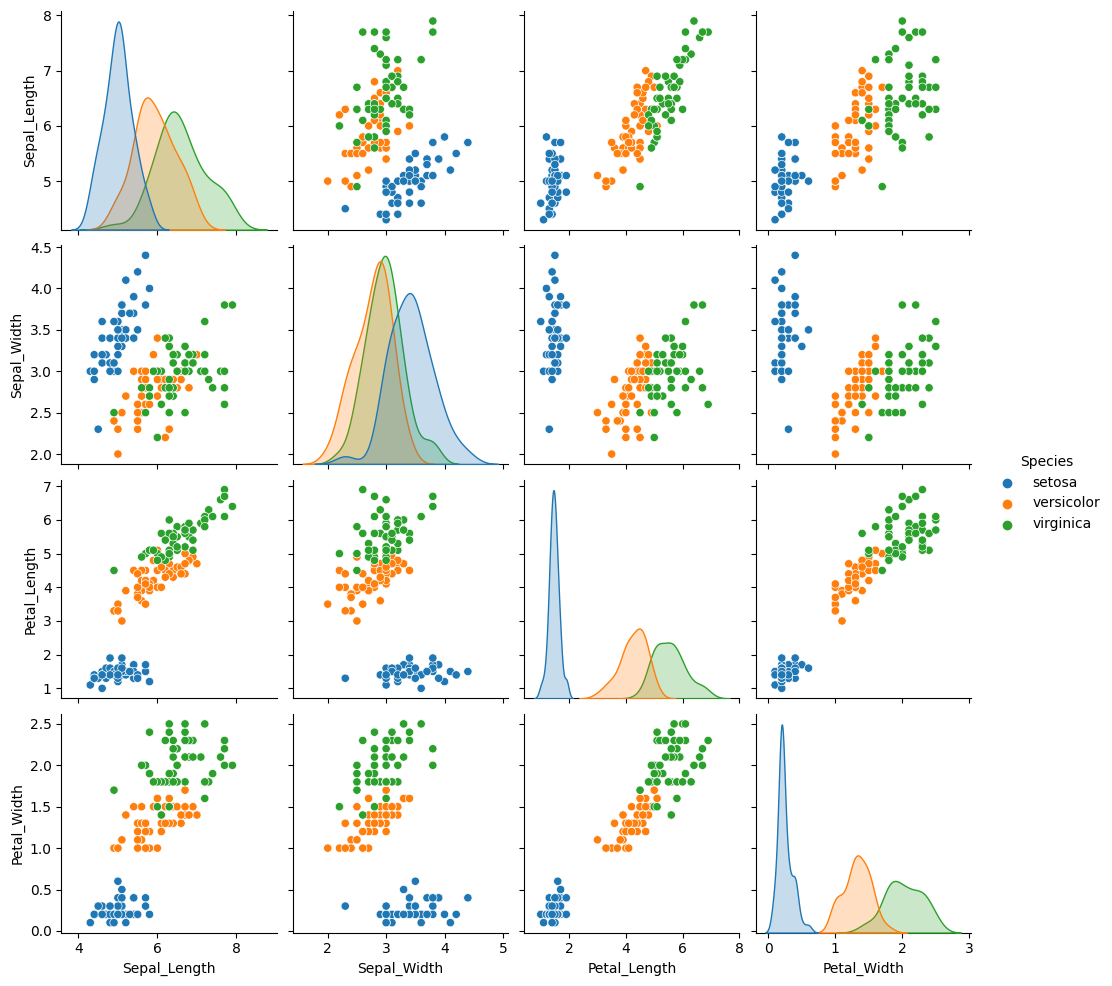

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 아래에서 참고 삼아 전체 dataset = training + test dataset의 그래프로 확인해 보았습니다.

sns.pairplot(df.iloc[:,1:6], hue='Species'); ## 사실 seaborn 없이 pd.plotting.scatter_matrix로도 할 수 있다.
plt.show()



In [ ]:
### 사실 train_dataset으로만 하는 것이 "원칙"입니다. 그래서 "다시" 해 보았습니다.

### 아래는 train_dataset으로만 만든 산점도입니다.

df_cat = pd.concat([X_train,y_train], axis=1)

df_cat.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
61,5.9,3.0,4.2,1.5,versicolor
92,5.8,2.6,4.0,1.2,versicolor
112,6.8,3.0,5.5,2.1,virginica
2,4.7,3.2,1.3,0.2,setosa
141,6.9,3.1,5.1,2.3,virginica


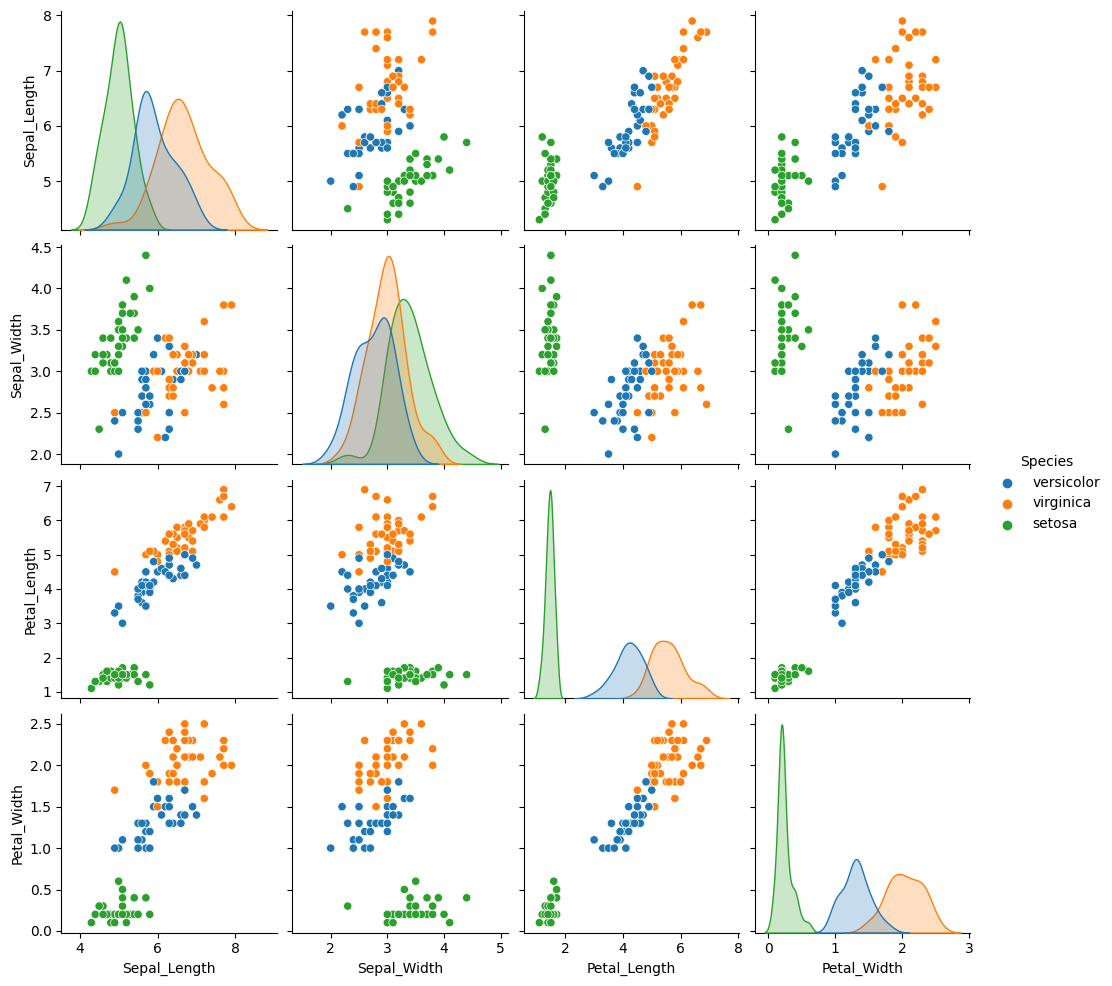

In [ ]:
# 그래프로 확인해 봅시다.
sns.pairplot(df_cat, hue='Species'); 
plt.show()

**HeatMap**을 통해 **Correlation**도 확인합니다.

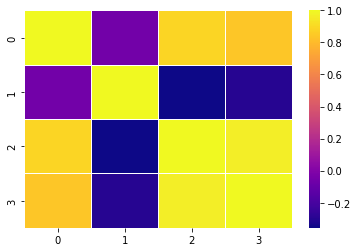

In [ ]:
import numpy as np

corr_mat=np.corrcoef(X_train,rowvar=False)

sns.heatmap(corr_mat,linewidth=1,cmap='plasma')
plt.show()

### 샐깔톤 참고 https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html

In [ ]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 61 to 47
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  112 non-null    float64
 1   Sepal_Width   112 non-null    float64
 2   Petal_Length  112 non-null    float64
 3   Petal_Width   112 non-null    float64
 4   Species       112 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.2+ KB


In [ ]:
df_cat.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,112.000000,112.000000,112.000000,112.000000
mean,5.886607,3.051786,3.796429,1.223214
std,0.871314,0.436196,1.800697,0.781427
min,4.300000,2.000000,1.100000,0.100000
25%,5.100000,2.800000,1.575000,0.300000
50%,5.800000,3.000000,4.250000,1.300000
75%,6.500000,3.300000,5.200000,1.900000
max,7.900000,4.400000,6.900000,2.500000


**'Species'의 내부에서 원소마다의 갯수**

위에 

`df['Species'].value_counts()`


도 같은 형태를 얻을 수 있습니다.

In [ ]:
df.groupby('Species').size()

Species
setosa        50
versicolor    50
virginica     50
dtype: int64

# **Distplot**

**"setosa"인 것**의 "Petal_Length"과 

**"setosa"를 제외한 것**의 "Petal_Length"의 분포 

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2103

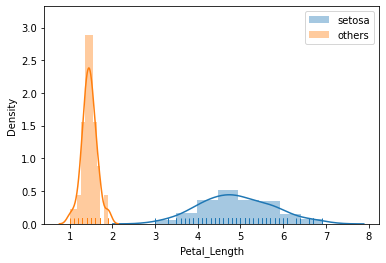

In [ ]:
sns.distplot(df[df.Species != "setosa"]["Petal_Length"], hist=True, rug=True, label="setosa")
sns.distplot(df[df.Species == "setosa"]["Petal_Length"], hist=True, rug=True, label="others")
plt.legend()
plt.show()

Boxplot을 사용하여 feature 별로 값의 분포

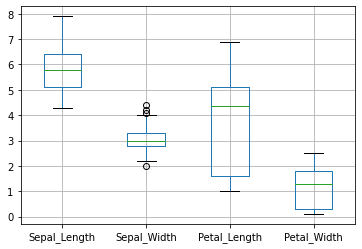

In [ ]:
df.iloc[:,1:5].boxplot()
plt.show()

# **4. kNN 실행.... 엄청 짧다.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

#5. **이제 새로운 data로 예측도 할 수 있다.**

In [ ]:
import numpy as np

X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape:", X_new.shape)


X_new.shape: (1, 4)


In [ ]:
prediction = knn.predict(X_new)
print("예측:", prediction)

예측: ['setosa']


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
y_pred = knn.predict(X_test)
print("테스트 세트에 대한 예측값:\n", y_pred)

테스트 세트에 대한 예측값:
 ['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa' 'virginica'
 'versicolor' 'setosa' 'virginica' 'virginica' 'versicolor' 'setosa'
 'virginica']


In [ ]:
print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

테스트 세트의 정확도: 0.97


In [ ]:
knn.score(X_test, y_test)

0.9736842105263158

In [ ]:
print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test, y_test)))

테스트 세트의 정확도: 0.97


In [ ]:
knn.score(X_test, y_test)

0.9736842105263158

참고: 

회귀의 경우 score는 $R^2 = 1 - \frac {\sum (target - estimate)^2} { \sum (target - mean)^2}$ 이다.

# **6. Grid Search**

In [ ]:
# grid search
from sklearn.model_selection import GridSearchCV

grid_params = {
    'n_neighbors' : list(range(1,20)),
    'weights' : ["uniform", "distance"],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

gs = GridSearchCV(knn, grid_params) ##, cv=10) cross-validation은 아직 안했음.
gs.fit(X_train, y_train)

print("Best Parameters : ", gs.best_params_)
print("Best Score : ", gs.best_score_)
print("Best Test Score : ", gs.score(X_test, y_test))

Best Parameters :  {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'uniform'}
Best Score :  0.9731225296442687
Best Test Score :  0.9736842105263158


In [ ]:
knn_best = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 12, weights = 'uniform')
knn_best.fit(X_train, y_train)


KNeighborsClassifier(metric='manhattan', n_neighbors=12)

In [ ]:
print('*** Test Accuracy *** \n   {}'.format(knn_best.score(X_test, y_test)))
##print('\n*** Confusion Matrix *** \n', confusion_matrix(y_test, knn_best.predict(X_test)))

*** Test Accuracy *** 
   0.9736842105263158


# **전처리 과정 중 Standardization**

# **fit===>transform** 의 구조를 알아야 한다.

In [5]:

# 데이터 전처리(표준화, Standardization)

from sklearn.preprocessing import StandardScaler

data = [[0, 0], [0, 0], [1, 1], [1, 1]]

scaler = StandardScaler()

scaler.fit(data)

print('결과1',scaler.mean_) ## mean_ 에 _가 있다.

print('결과2', scaler.transform(data))

print('결과3',scaler.transform([[2, 2]]))

결과1 [0.5 0.5]
결과2 [[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]
결과3 [[3. 3.]]


# **좋지 못한 예**

In [6]:
## 앞의 붓꽃 data를 변환하자.
## https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html 참고하세요.

std = StandardScaler()



std.fit(X_train)
X_train_std = std.transform(X_train)
print('각각 평균', std.mean_)
print('각각 분산', std.var_)


### 여기 중요!! X_train에서 설정된 평균과 분산으로 X_test를 변환하는 것이다.

X_test_std = std.transform(X_test)


### 변신 뒤에는 numpy array로 바뀐다. 

type(X_train_std)

각각 평균 [5.88660714 3.05178571 3.79642857 1.22321429]
각각 분산 [0.75240992 0.18856824 3.21355867 0.60517538]


numpy.ndarray

In [9]:
new_X_train = pd.DataFrame(X_train_std)

new_X_train.head()

### 인덱스가 이상하게 변했다.

,0,1,2,3
0,0.015440,-0.119255,0.225127,0.355798
1,-0.099845,-1.040395,0.113560,-0.029841
2,1.053005,-0.119255,0.950314,1.127075
3,-1.367980,0.341315,-1.392599,-1.315303
4,1.168290,0.111030,0.727180,1.384168


아래는 잘못연결이 된 경우

In [ ]:



df_cat_std = pd.concat([new_X_train,y_train], axis=1)

df_cat_std.head()

## 새로운 인덱스와 옛날 인덱스가 뒤죽박죽 붙었다.


,0,1,2,3,Species
0,0.015440,-0.119255,0.225127,0.355798,setosa
1,-0.099845,-1.040395,0.113560,-0.029841,setosa
2,1.053005,-0.119255,0.950314,1.127075,setosa
3,-1.367980,0.341315,-1.392599,-1.315303,setosa
4,1.168290,0.111030,0.727180,1.384168,setosa


In [ ]:
y_train.head()

61     versicolor
92     versicolor
112     virginica
2          setosa
141     virginica
Name: Species, dtype: object

아래 그래프가 이상하다.

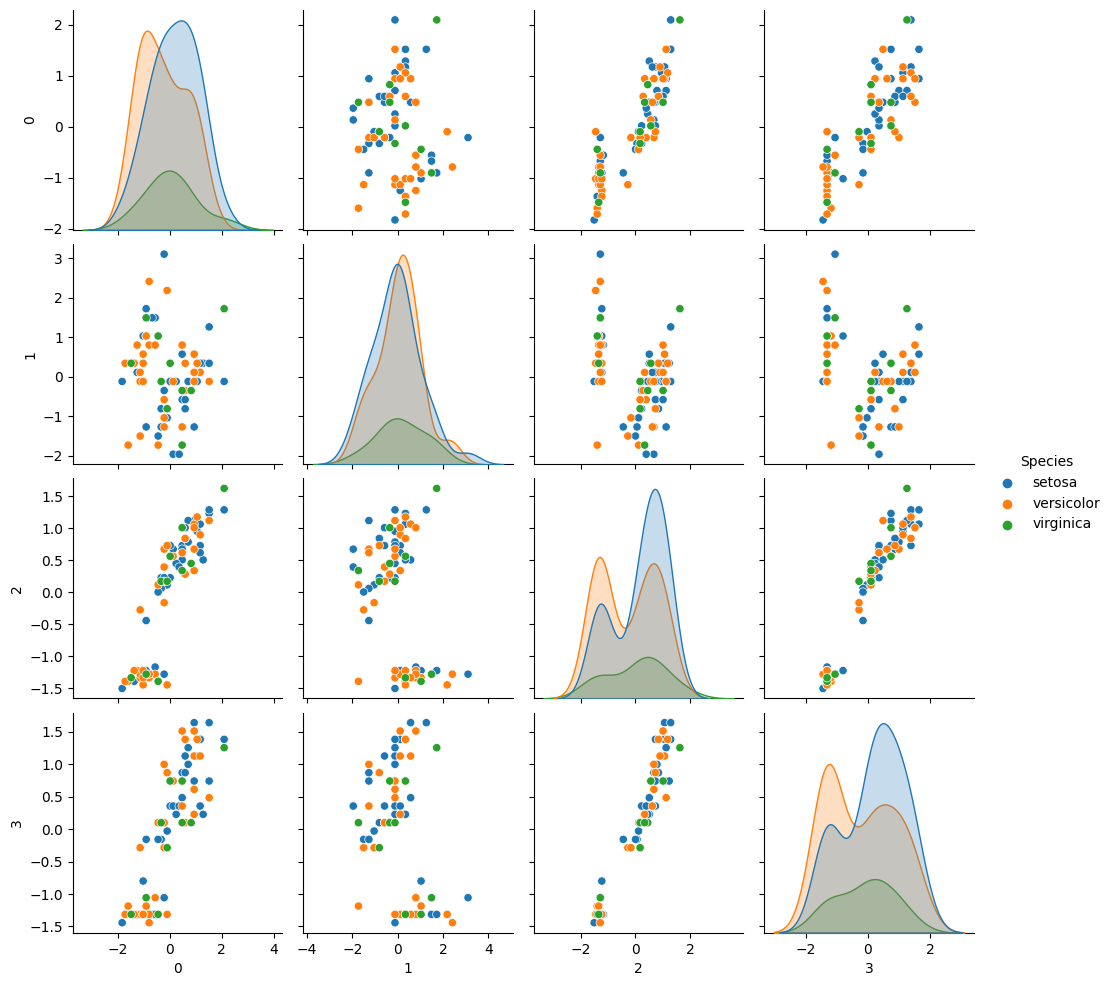

In [ ]:
# 그래프로 확인해 봅시다. 원래 가지고 있던 것과 많이 다르다.

sns.pairplot(df_cat_std, hue='Species'); 
plt.show()

그래서 y_train을 np.array로 바꿔서 인덱스 세탁을 하고, 다시 pandas dataframe으로 바꾸었다.

In [ ]:
y_train2=np.asarray(y_train) ### np.asarray와 np.array는 copy=true 냐 false냐라는 것이 차이가 있다.
y_train=pd.DataFrame(y_train2)

In [ ]:

df_cat_std = pd.concat([new_X_train,y_train], axis=1)

df_cat_std.head()

,0,1,2,3,0
0,0.015440,-0.119255,0.225127,0.355798,versicolor
1,-0.099845,-1.040395,0.113560,-0.029841,versicolor
2,1.053005,-0.119255,0.950314,1.127075,virginica
3,-1.367980,0.341315,-1.392599,-1.315303,setosa
4,1.168290,0.111030,0.727180,1.384168,virginica


In [ ]:
df_cat_std.tail()

,0,1,2,3,0
107,-1.137410,0.111030,-1.281032,-1.443850,setosa
108,0.476580,-0.349540,1.006098,0.741436,virginica
109,-0.099845,-0.810110,0.169343,-0.286934,versicolor
110,2.090570,1.723026,1.619718,1.255621,virginica
111,-1.483265,0.341315,-1.336815,-1.315303,setosa


인덱스 이름이 후져서 바꾸어 보았다.

In [ ]:
df_cat_std.columns = ['0','1','2','3','Species'] 

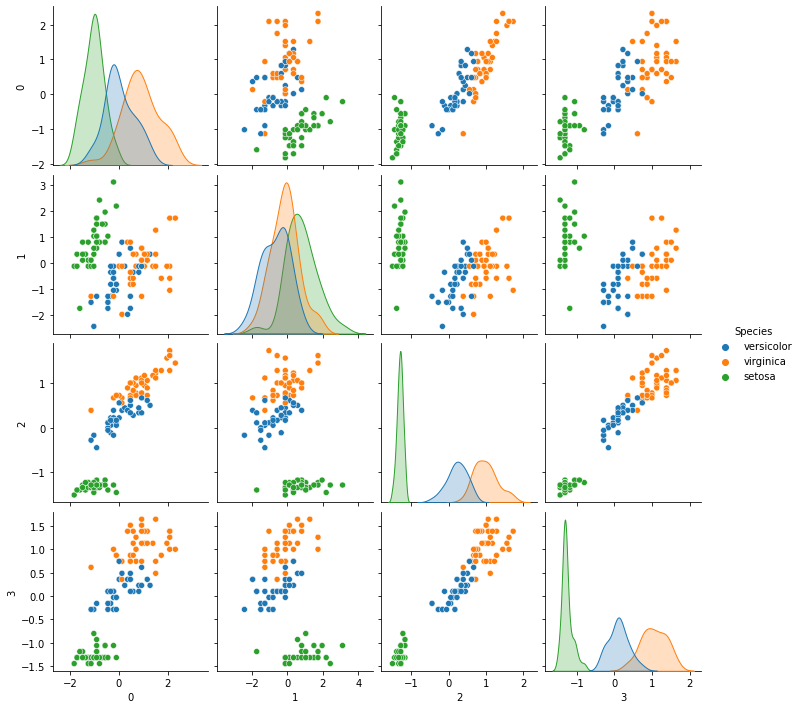

In [ ]:
# 그래프로 확인해 봅시다.
sns.pairplot(df_cat_std, hue='Species'); 
plt.show()

In [ ]:
# grid search
from sklearn.model_selection import GridSearchCV

grid_params = {
    'n_neighbors' : list(range(1,20)),
    'weights' : ["uniform", "distance"],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

gs2 = GridSearchCV(knn, grid_params) 
gs2.fit(df_cat_std.iloc[:,0:4],df_cat_std.iloc[:,4])

print("Best Parameters : ", gs2.best_params_)
print("Best Score : ", gs2.best_score_)


Best Parameters :  {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Best Score :  0.9644268774703558


In [ ]:
X_test_std=pd.DataFrame(X_test_std)
X_test_std.head()

,0,1,2,3
0,-0.099845,-0.579825,0.727180,1.512714
1,0.130725,-1.961535,0.113560,-0.286934
2,-0.445700,2.644166,-1.336815,-1.315303
3,1.629430,-0.349540,1.396583,0.741436
4,-1.022125,0.801885,-1.281032,-1.315303


In [ ]:
print("Best Test Score : ", gs2.score(X_test_std, y_test))

Best Test Score :  0.9736842105263158


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# **index를 넣은 살린 경우**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier


Url_iris="https://raw.githubusercontent.com/gundaminpde/2022/main/iris.csv"


df = pd.read_csv(Url_iris)

X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,1:5], df.loc[:,'Species'], random_state=0)

X_train.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
61,5.9,3.0,4.2,1.5
92,5.8,2.6,4.0,1.2
112,6.8,3.0,5.5,2.1
2,4.7,3.2,1.3,0.2
141,6.9,3.1,5.1,2.3


In [ ]:
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
std = StandardScaler()
std.fit(X_train.iloc[:,0:])
X_train.iloc[:,0:]= std.transform(X_train.iloc[:,0:])    ## 이 부분이 포인트 iloc 사용
X_train.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
61,0.015440,-0.119255,0.225127,0.355798
92,-0.099845,-1.040395,0.113560,-0.029841
112,1.053005,-0.119255,0.950314,1.127075
2,-1.367980,0.341315,-1.392599,-1.315303
141,1.168290,0.111030,0.727180,1.384168


In [ ]:
y_train.head()

61     versicolor
92     versicolor
112     virginica
2          setosa
141     virginica
Name: Species, dtype: object

In [ ]:
df_cat_std = pd.concat([X_train,y_train], axis=1)

df_cat_std.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
61,0.015440,-0.119255,0.225127,0.355798,versicolor
92,-0.099845,-1.040395,0.113560,-0.029841,versicolor
112,1.053005,-0.119255,0.950314,1.127075,virginica
2,-1.367980,0.341315,-1.392599,-1.315303,setosa
141,1.168290,0.111030,0.727180,1.384168,virginica


# **결측치(Missing Values) 채우기**

In [ ]:
from sklearn.impute import KNNImputer

Url_house="https://raw.githubusercontent.com/gundaminpde/2023-spring/main/Dset_HousingData.csv"


df_house = pd.read_csv(Url_house)

###data를 보니 결측치자 보인다.
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
df_house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


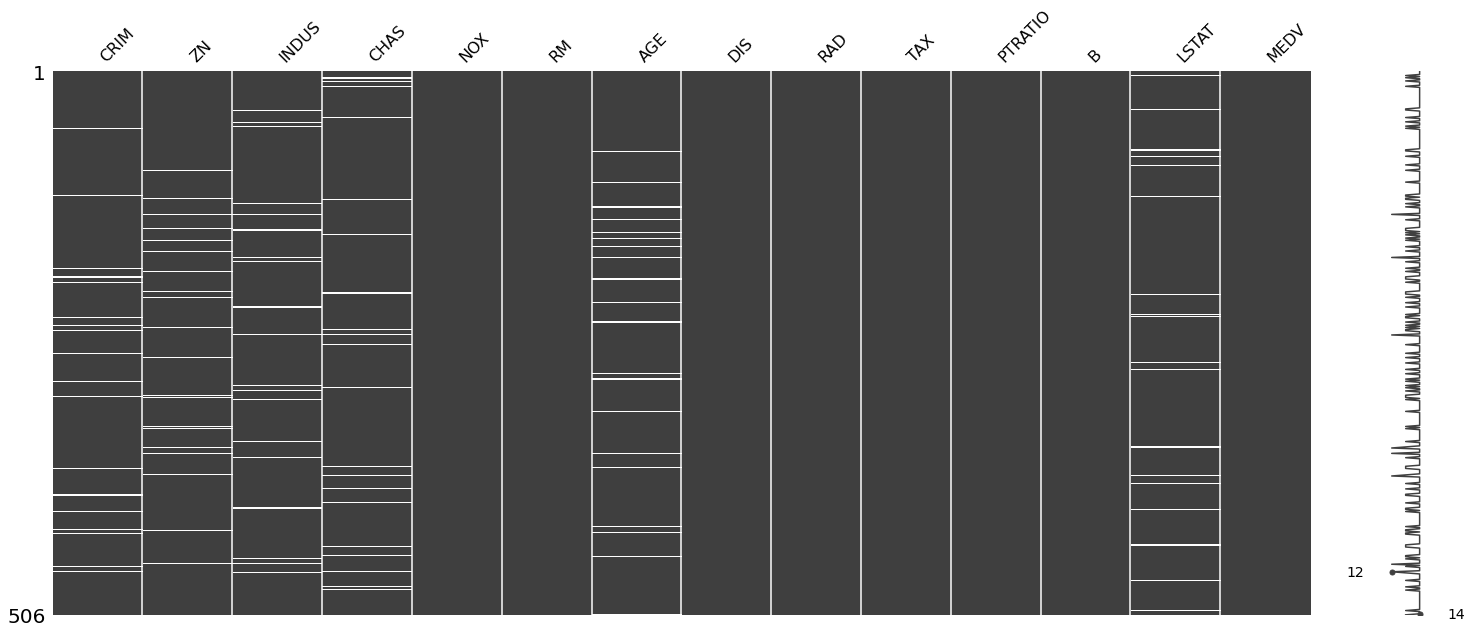

In [ ]:
## 결측치 시각화

import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df_house)
plt.show()

In [ ]:
### 결측치를 모두 몇 개인지 세어 많은 것부터 순서대로 나열한다.

df_house.isnull().sum().sort_values(ascending=False).head(40)

CRIM       20
ZN         20
INDUS      20
CHAS       20
AGE        20
LSTAT      20
NOX         0
RM          0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
MEDV        0
dtype: int64

(A) kNN으로 채워 넣기

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)

df_house_imputed=imputer.fit_transform(df_house) ### 이건 fit과 동시에 transform

In [ ]:
df_house_imputed2=pd.DataFrame(df_house_imputed)
df_house_imputed2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    float64
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    float64
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  13      506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


(B) 평균으로 채워 넣기

In [ ]:
df_mean = df_house.fillna(df_house.mean())

df_mean.isnull().sum().sort_values(ascending=False).head(40)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# **또 다른 예제, 범주형 결측치**

In [ ]:
Url_Customers="https://raw.githubusercontent.com/gundaminpde/2023-spring/main/Customers.csv"

df_Customer = pd.read_csv(Url_Customers)

df_Customer.info().  ## profession이 문제다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


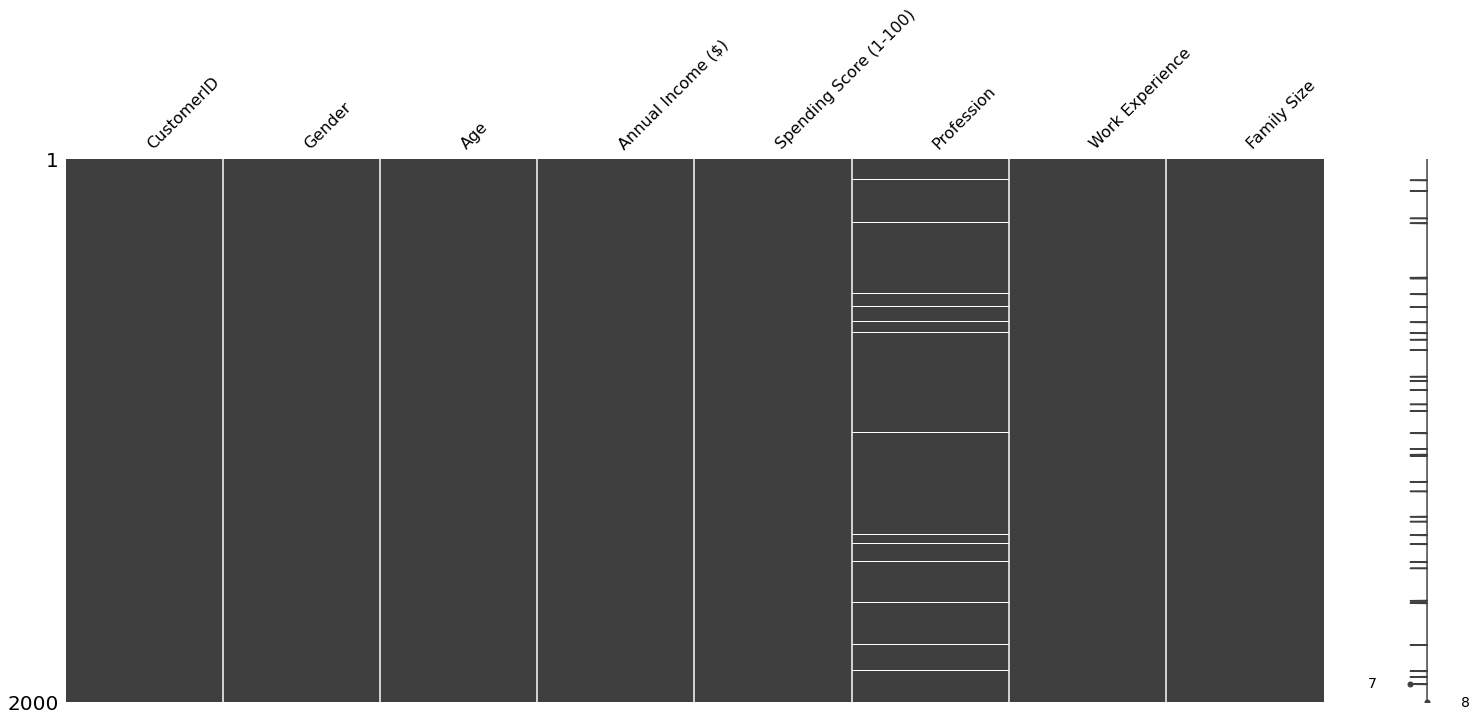

In [ ]:
## 결측치 시각화

import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df_Customer)
plt.show()

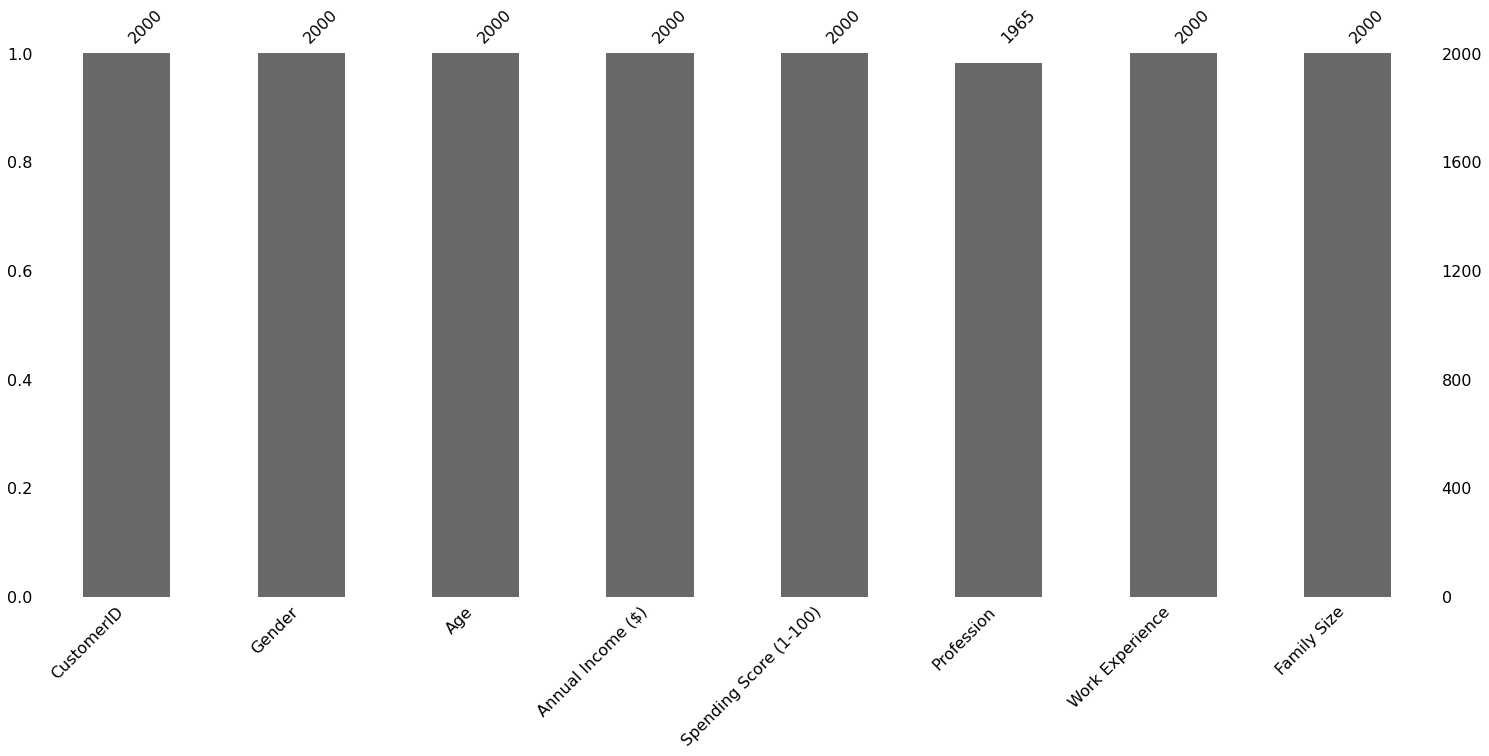

In [ ]:
msno.bar(df_Customer)
plt.show()

뭐가 있나 확인해 보니 결측치는 nan으로 나와있다. (Not A Number)

In [ ]:
df_Customer['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', nan], dtype=object)

kNN으로 채워볼까 해서 one-hot encoder를 했다.
왜냐하면 KNNImputer가 숫자데이터만 사용하기 때문이다.

In [ ]:
dummy = pd.get_dummies(df_Customer)
dummy
## nan이 없고 해당한 부분이 [0,0,0,...,0]로 채워진다.

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_Female,Gender_Male,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,1,19,15000,39,1,4,0,1,0,0,0,0,0,1,0,0,0
1,2,21,35000,81,3,3,0,1,0,0,1,0,0,0,0,0,0
2,3,20,86000,6,1,1,1,0,0,0,1,0,0,0,0,0,0
3,4,23,59000,77,0,2,1,0,0,0,0,0,0,0,0,1,0
4,5,31,38000,40,2,6,1,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,71,184387,40,8,7,1,0,1,0,0,0,0,0,0,0,0
1996,1997,91,73158,32,7,7,1,0,0,1,0,0,0,0,0,0,0
1997,1998,87,90961,14,9,2,0,1,0,0,0,0,0,1,0,0,0
1998,1999,77,182109,4,7,2,0,1,0,0,0,0,1,0,0,0,0


In [ ]:
type(dummy)

pandas.core.frame.DataFrame

In [ ]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   CustomerID                2000 non-null   int64
 1   Age                       2000 non-null   int64
 2   Annual Income ($)         2000 non-null   int64
 3   Spending Score (1-100)    2000 non-null   int64
 4   Work Experience           2000 non-null   int64
 5   Family Size               2000 non-null   int64
 6   Gender_Female             2000 non-null   uint8
 7   Gender_Male               2000 non-null   uint8
 8   Profession_Artist         2000 non-null   uint8
 9   Profession_Doctor         2000 non-null   uint8
 10  Profession_Engineer       2000 non-null   uint8
 11  Profession_Entertainment  2000 non-null   uint8
 12  Profession_Executive      2000 non-null   uint8
 13  Profession_Healthcare     2000 non-null   uint8
 14  Profession_Homemaker      2000 non-null 

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

ohe.fit(df_Customer[['Profession']])

AA = ohe.transform(df_Customer[['Profession']])

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
type(AA)

numpy.ndarray

In [ ]:
AA=pd.DataFrame(AA)

In [ ]:
AA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2000 non-null   float64
 1   1       2000 non-null   float64
 2   2       2000 non-null   float64
 3   3       2000 non-null   float64
 4   4       2000 non-null   float64
 5   5       2000 non-null   float64
 6   6       2000 non-null   float64
 7   7       2000 non-null   float64
 8   8       2000 non-null   float64
 9   9       2000 non-null   float64
dtypes: float64(10)
memory usage: 156.4 KB


In [ ]:
AA[9].describe()

count    2000.000000
mean        0.017500
std         0.131158
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: 9, dtype: float64

In [ ]:
AA[9]==1

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Name: 9, Length: 2000, dtype: bool

In [ ]:
AA.loc[AA[9]==1]=np.NaN

In [ ]:
AA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1965 non-null   float64
 1   1       1965 non-null   float64
 2   2       1965 non-null   float64
 3   3       1965 non-null   float64
 4   4       1965 non-null   float64
 5   5       1965 non-null   float64
 6   6       1965 non-null   float64
 7   7       1965 non-null   float64
 8   8       1965 non-null   float64
 9   9       1965 non-null   float64
dtypes: float64(10)
memory usage: 156.4 KB


In [ ]:
AA=AA.drop([9],axis=1) #axis=1 대신 axis='columns'

In [ ]:
AA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1965 non-null   float64
 1   1       1965 non-null   float64
 2   2       1965 non-null   float64
 3   3       1965 non-null   float64
 4   4       1965 non-null   float64
 5   5       1965 non-null   float64
 6   6       1965 non-null   float64
 7   7       1965 non-null   float64
 8   8       1965 non-null   float64
dtypes: float64(9)
memory usage: 140.8 KB


In [ ]:
df_Customer2=df_Customer.drop(['CustomerID','Profession'],axis=1)

In [ ]:
df_Customer_cat = pd.concat([df_Customer2,AA], axis=1)

In [ ]:
df_Customer_cat.head()

,Gender,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,0,1,2,3,4,5,6,7,8
0,Male,19,15000,39,1,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Male,21,35000,81,3,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Female,20,86000,6,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Female,23,59000,77,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Female,31,38000,40,2,6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_Customer_cat.columns = df_Customer_cat.columns.astype(str)

In [ ]:
df_Customer3=df_Customer_cat.drop(['Gender'],axis=1)

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)

AAA=imputer.fit_transform(df_Customer3)

In [ ]:
BBB=pd.DataFrame(AAA)

BBB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2000 non-null   float64
 1   1       2000 non-null   float64
 2   2       2000 non-null   float64
 3   3       2000 non-null   float64
 4   4       2000 non-null   float64
 5   5       2000 non-null   float64
 6   6       2000 non-null   float64
 7   7       2000 non-null   float64
 8   8       2000 non-null   float64
 9   9       2000 non-null   float64
 10  10      2000 non-null   float64
 11  11      2000 non-null   float64
 12  12      2000 non-null   float64
 13  13      2000 non-null   float64
dtypes: float64(14)
memory usage: 218.9 KB
